In [1]:
f1_txt=""


filepath = "../dune/01 dune.txt"
with open(filepath,encoding="utf8", errors='ignore') as fp:
   line = fp.readline()
   cnt = 1
   while line:
       #print("{}".format( line.strip()))
       f1_txt=f1_txt+line
       line = fp.readline()
       cnt += 1
       

In [2]:
#print(f1_txt[:100])

# Basliyor 

## Libraries

In [3]:
import numpy as np
from pywt import wavedec
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [25, 20]

## Functions

In [4]:
import numpy as np
from pywt import wavedec
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [25, 20]     


def genData(param, show = False):
	a=[]
	if param[0]=="normal":
		mu, sigma, s = param[1],   param[2], param[3]
		a= np.random.normal(mu, sigma, size=s)
	elif param[0]=='uniform':
		mi, ma,s=param[1],   param[2], param[3]
		a= np.random.uniform(mi, ma, s)
	elif param[0]=="poisson":
		rate,s=param[1],   param[2]
		a = np.random.poisson(rate, s)
	if(show):
		count, bins, ignored = plt.hist(s, 14, density=True)
	return a

In [5]:
def genSample(signalCount):
    print("generate sample data")
    signals = [] 
    for i in range(signalCount):
        a = genData(["normal", 100,100,8])
        #print(a)
        sig = [] 
        for j in range(8):
            sig.append(int(a[j]))
        signals.append(sig)
    for i in range(signalCount):
        print(signals[i])
    return signals

In [6]:
def getSamplePredef():
    print("return sample data")
    signals = [[105, 220, 23, 99, 266, 190, 37, 5],
                [334, 174, 134, -7, 19, 155, 93, 89],
                [72, 96, 102, 151, -14, 171, 127, 127],
                [151, 38, 283, 204, 232, 141, 121, 47],
                [157, -60, 54, 54, 69, -27, -14, 101],
                [0, 113, 74, 176, 68, 322, 135, 367],
                [56, 114, 126, 181, 93, 41, 118, 76],
                [164, 200, 351, 51, 36, 163, 298, -5],
                [140, 124, 99, 34, -46, -5, 240, 136],
                [113, 58, 130, 123, 171, 143, 109, 17],
                [-8, 299, 65, 62, 130, 146, -43, 23],
                [-96, 212, 56, 150, -55, 150, 151, 70],
                [-22, 148, 219, 62, 108, 136, 198, 126],
                [220, 84, 165, 167, 1, 227, 15, 144],
                [0, 135, 165, 64, 100, 224, 244, 140],
                [211, 183, -161, 65, 33, 257, -16, 112]]
    return signals

In [7]:
def mergeList(input_data, verbose= False):
    if verbose:
        print("merge data")
    merged_list = []
    for l in input_data:
        merged_list += list(l)
    return merged_list

In [8]:
def listToPandasDF(input_data):
    df = pd.DataFrame(input_data)
    return df

In [9]:
def getWaveletCoefs(input_data):
    coefs = [] 
    for i in range(len(input_data)):
        girdi = np.array(input_data[i]) #np.array([1,2,3,4,5,6,7,8])*1
        coeff = wavedec(girdi, 'haar', level=int(np.log2(len(girdi))))
        coefs.append(mergeList(coeff))
    return coefs

In [10]:
def plotCorrelation(input_data_frame):
    Var_Corr = input_data_frame.corr()
    # plot the heatmap and annotation on it
    sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
    plt.show()
    # Basic correlogram
    sns_plot = sns.pairplot(input_data_frame)
    plt.show()

In [11]:
def generateOperationsSymbols(operations_count, symbol_list, Test = False, verbose= False):
    ops_ids=[]
    symbolSet = []
    
    for i in range(operations_count):
        if(verbose):print(i, end="\t")
        a = genData(["uniform", 0,10,4])    
        a= [int(x) for x in a]
        if(Test):
            a[3]=0
        go = True        
        #a=[4, 5, 9, -5]
        
        rez = 0
        if(int(a[1])%4==0   ): # operation is + 
            if ( a[0] + a[2] > 9 ):
                go = False
            else :
                rez = a[0] + a[2]
        elif(int(a[1])%4==1   ): # operation is -
            if a[0] < a[2]  :
                go = False                
            else :
                #print("here", a[0] - a[2] , a[0] > a[2])
                rez = a[0] - a[2]
        elif(int(a[1])%4==2   ): # operation is *
            if ( a[0] * a[2] >9  ):
                go = False
            else :                
                rez = a[0] * a[2]               
        elif(int(a[1])%4==3   ): # operation is -
            if ( a[2] ==0 ):                
                go = False
            else :
                rez = int(a[0] / a[2])
        #rint(go)  
        if go:
            if verbose : print(go , rez)
            a[3]=rez
            ops_ids.append(a)
            symbolSet.append(symbol_list[a[0]] )
            symbolSet.append(symbol_list[a[1]%4+10] )
            symbolSet.append(symbol_list[a[2]] )
            symbolSet.append(symbol_list[14] )
            if(not Test):
                symbolSet.append(symbol_list[a[3]] )
            else:
                symbolSet.append(symbol_list[15] )
    return ops_ids, symbolSet
            

In [12]:
def generateOperations(operations_count, Test = False, verbose= False):
    energy = 0 
    all=[]
    for i in range(operations_count):
        if(verbose):print(i, end="\t")
        a = genData(["uniform", 0,10,4])    
        a= [int(x) for x in a]
        if(True):#Test):
            a[3]=0
            
        all.append(a)
        #print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)
        if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
            if(verbose):
                print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
        elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
            if(verbose):print(int(a[0]) , "+", int(a[2]) ,"= ?")
        elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
            if(int(a[2])<int(a[0])):
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))
            else:
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  - int(a[0])))          
        elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
            if(verbose):print(int(a[0]) , "-", int(a[2]) ,"= ?")        
        
        elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
            if(verbose):print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
        elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
            if(verbose):print(int(a[0]) , "*", int(a[2]) ,"= ?")
        
        elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
            if(int(a[2])!=0):
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
            elif(int(a[0])!=0):
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  / int(a[0])))    
        
        elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
            if(verbose):print(int(a[0]) , "/", int(a[2]) ,"= ?")
    return all

In [13]:
def decodeOperations(all):
    for i in range(1):
        print(i, end="\t")
        a = all[i]
        #print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)
        if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
            print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
        elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
            print(int(a[0]) , "+", int(a[2]) ,"= ?")
        elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
            if(int(a[2])<int(a[0])):
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))
            else:
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  - int(a[0])))          
        elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
            print(int(a[0]) , "-", int(a[2]) ,"= ?")        
        elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
            print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
        elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
            print(int(a[0]) , "*", int(a[2]) ,"= ?")
        elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
            if(int(a[2])>0):
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
            else:
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  / int(a[0])))    
        elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
            print(int(a[0]) , "/", int(a[2]) ,"= ?")

In [14]:
def decodeTrainOperations(all):
    for i in range(len(all)):
        print(i, end="\t")
        a = all[i]
        
        if(int(a[1])%4==0   ):
            print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
       
        elif(int(a[1])%4==1  ):            
            print(int(a[0]) , "-", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))            
        
        elif(int(a[1])%4==2   ):
            print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
                    
        elif(int(a[1])%4==3 ):            
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
           

In [15]:
def quantize(input_data, len_of_data, verbose = False):
    borders = [-200,-100,-50,0, 50, 100, 200]
    qsignals = [] 

    for i in range(len(input_data)):
        sig = [] 
        if(verbose):
            print(input_data[i])
        for j in range(int(len(input_data[i]))):
            output = 7
            for k in range(7):
                if( input_data[i][j] < borders[k]):
                    output = k
                    break
            if verbose:
                print(output, end = " ")
            sig.append(output)
        if verbose:
            print()
        qsignals.append(sig)
    return qsignals

In [16]:
def decodeOperationsDeeper(input_data, len_data, qsignals, verbose = False):
    inputs = [] 
    for i in range(len_data):

        if (verbose):print(i, end="\t")
        a = input_data[i]
        if(verbose):print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)

        if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
            if(int(a[0])  + int(a[2]) < 10):
                if(verbose):
                    print( qsignals[int(a[0])] , "+", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  + int(a[2])])            
                    print( qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  + int(a[2])])            
                inputs.append([ qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] , qsignals[int(a[0])  + int(a[2])]])            
        elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
            if(verbose):
                print( qsignals[int(a[0])] , "+", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] , qsignals[14]])

        elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
            if(int(a[2])<int(a[0])):
                if(verbose):
                    print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  - int(a[2])])
                    print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  - int(a[2])])
                inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[int(a[0])  - int(a[2])]])
            else:
                if(verbose):
                    print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[int(a[2])  - int(a[0])])   
                    print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[int(a[2])  - int(a[0])])   
                inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[int(a[2])  - int(a[0])]])

        elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
            if(verbose):
                print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[14]])        

        elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
            if(int(a[0])  * int(a[2]) < 10):
                if(verbose):
                    print( qsignals[int(a[0])] , "*", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  * int(a[2])])
                    print( qsignals[int(a[0])] , qsignals[12], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  * int(a[2])])
                inputs.append( [qsignals[int(a[0])] , qsignals[12], qsignals[int(a[2])] , qsignals[int(a[0])  * int(a[2])]])
        elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
            if(verbose):
                print( qsignals[int(a[0])] , "*", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] ,  qsignals[12], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] ,  qsignals[12], qsignals[int(a[2])] , qsignals[14]])
        elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
            if(int(a[2])>0):            
                if(verbose):
                    print( qsignals[int(a[0])] , "/", qsignals[int(a[2])] ,"=", qsignals[int( int(a[0])  /int(a[2]))])
                    print( qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] ,"=", qsignals[int(int(a[0])  /int(a[2]))])
                inputs.append( [qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] , qsignals[ int(int(a[0])  /int(a[2]))]])

        elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
            if(verbose):
                print( qsignals[int(a[0])] , "/", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] , qsignals[14]])
    return inputs




In [17]:
def initTree():
    GG=nx.DiGraph()    
    GG.add_node(0, value=999,occurance_count=1, id = -1,food =0)    
    return GG,1

In [18]:
def train_tree(input_data, GG, counter , WL, overlap):
    plt.rcParams.update({'font.size': 22})
    data1= input_data  
    #print(data1)
    poz = 0
    #print(len(data1)/WL)    
    step = WL-overlap

    for i in range(0,len(data1)-step+1, step):
        #if(data1[i:i+step]==[0,0,1,0] or  data1[i:i+step]==[1,0,0,0] ):
        #    //print(str(i)+ " food")
        poz=0
        for j in range(WL):
            # data
            d=data1[i + j]
            #print(d, end=' ')
            #print (d)
            # neighbours 
            nei= list(GG.neighbors(poz))       
            if len(nei)==0:
                #print (counter, poz, data1[i: i+step])
                GG.add_node(counter,value=d, occurance_count=1, id = -1,food =0)    
                GG.add_edge(poz,counter)
                poz=counter
                counter +=1
            else:
                k=-1
                for n in nei:
                    if(GG.node[n]['value']==d):
                        k=n
                        break
                if(k>=0):
                    poz=k
                    GG.node[k]['occurance_count'] = GG.node[k]['occurance_count'] + 1
                else:
                    GG.add_node(counter,value=d,occurance_count=1, id = -1,food =0)    
                    GG.add_edge(poz,counter)
                    poz=counter
                    counter += 1
    finalNodes = [] 
    for i in range(1, counter):
        yol =  nx.shortest_path(GG,0,i)
        if(len(yol) >WL):
            GG.node[yol[-1]]['id']=len(finalNodes)
            finalNodes.append(yol[-1])
    return GG, counter


In [19]:
def plotGraph(GG, WL, counter, short = False):
    plt.rcParams['figure.figsize'] = [15, 10]        
    labels=dict((n,d['value']) for n,d in GG.nodes(data=True))   
    #pos=nx.graphviz_layout(GG, prog='dot')
    pos =graphviz_layout(GG, prog='dot')
    #nx.spring_layout(GG)

    plt.title("node values")
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
    plt.show()
    if( short):
        return
    plt.title("node ids")
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True )
    plt.show()

    plt.title("node frequency")
    labels=dict((n,d['occurance_count']) for n,d in GG.nodes(data=True))   
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
    plt.show()

    

    plt.title("final nodes ids")
    labels=dict((n,d['id']) for n,d in GG.nodes(data=True))   
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
    plt.show()    

In [20]:
def getBranchId(branch,GG, counter , WL, overlap):    
    ids = []
    plt.rcParams.update({'font.size': 22})
    data1= branch  
    #print (data1)
    poz = 0
    #print(len(data1)/WL)    
    step = WL-overlap
    
    for i in range(0,len(data1)-step+1, step):
        k=0
        poz=0
        #print()
        for j in range(WL):
            # data
            d=data1[i + j]
            
            # neighbours 
            nei= list(GG.neighbors(poz))       
            if len(nei)==0:
                k=-1
                break
            else:
                k=-1
                for n in nei:
                    if(GG.node[n]['value']==d):
                        k=n
                        break
                if(k>=0):
                    poz=k                    
                    #GG.node[k]['occurance_count'] = GG.node[k]['occurance_count'] + 1
                else:
                    k=-1
                    break
        #ids.append(k)
        
        #ids.append(GG.node[k]['id'])
        if(k>0):
            ids.append(GG.node[k]['id'])
        else:
            ids.append(-1)
    return ids


In [21]:
def getBranchGivenStartNodeValue(startNodeValue,GG, counter , WL, overlap):    
    data = [] 
    nei= list(GG.neighbors(0))      
    #print(nei)
    k=-1
    for n in nei:
        if(GG.node[n]['value']==startNodeValue):
            k=n
            break
    #print(k)
    #data.append(k)
    
    while(k>=0):
        nei= list(GG.neighbors(k))    
        if len(nei)==0:
            k=-1
        else:
            k=nei[0]
            data.append(GG.node[k]['value'])
    return data


In [22]:
def checkBranch(branch,GG, counter , WL, overlap):    
    ids = []
    plt.rcParams.update({'font.size': 22})
    data1= branch  
    #print (data1)
    poz = 0
    #print(len(data1)/WL)    
    step = WL-overlap
    
    for i in range(0,len(data1)-step+1, step):
        k=0
        poz=0
        #print()
        j=0
        # data
        d=data1[i + j]

        # neighbours 
        nei= list(GG.neighbors(poz))       
        if len(nei)==0:
            k=-1
            break
        else:
            k=-1
            for n in nei:
                if(GG.node[n]['value']==d):
                    k=n
                    break
            if(k>=0):
                poz=k                    
                #GG.node[k]['occurance_count'] = GG.node[k]['occurance_count'] + 1
            else:
                k=-1
                break
        #ids.append(k)
        
        #ids.append(GG.node[k]['id'])
        if(k>0):
            ids.append(GG.node[k]['value'])
        else:
            ids.append(-1)
    return ids

In [23]:
def buildAbstractTree(GG, symbols, ops,counter):
    #print(b)
    decodedOps=decodeOperationsDeeper(input_data=ops,len_data=20, qsignals= quantize(symbols,len_of_data=4) )
    
    GG,counter = train_tree( mergeList(mergeList(decodedOps)), GG, counter , WL, overlap)
    plotGraph(GG,WL,counter)
    return GG, counter


In [24]:
def addBranches(GG,ops,counter,WL, overlap=0, doPlot = False):    
    GG,counter = train_tree( (mergeList(ops)), GG, counter , WL, overlap)
    if doPlot:
        plotGraph(GG,WL,counter)
    return GG, counter

In [25]:
def buildContextTree(GG, ops,counter,WL, overlap=0):
    #print(b)
    #decodedOps=decodeOperationsDeeper(input_data=ops,len_data=20, qsignals= quantize(symbols,len_of_data=4) )
    
    GG,counter = train_tree( ops, GG, counter , WL, overlap)
    plotGraph(GG,WL,counter)
    return GG, counter

In [26]:

#GG= initTree()
WL = 8 # window length
overlap = 0# int(WL/5)
GG,counter = initTree()

symbols= genSample(16)
wsymbols= ( getWaveletCoefs(symbols))
print()
for i in range(len(wsymbols)):
    #print(symbols[i])
    print(i,[ int(j) for j in wsymbols[i]])
#a= getSamplePredef()

generate sample data
[130, 121, 155, 123, 145, 264, 226, 72]
[245, 4, 49, 58, 68, 165, 150, 139]
[-37, 93, 297, 67, 152, 146, 40, 202]
[236, 182, 132, 101, 52, 119, 4, 62]
[59, -10, 263, 11, 270, 107, 240, 142]
[-65, 51, 144, -21, 25, 115, 8, 37]
[164, 71, 169, 41, 73, 143, 9, 170]
[93, 16, -31, 35, 129, -55, 182, 219]
[90, -24, 90, -162, 289, 27, 323, 54]
[114, -177, 23, 133, 60, -23, 118, 260]
[202, 306, 198, 20, 35, 132, 85, 196]
[-81, 85, 25, 131, 214, 282, 97, 125]
[138, 166, 244, -43, 278, 153, 98, 149]
[39, 27, 91, 90, 55, 168, 55, 98]
[87, 206, -73, 269, 44, 137, 139, -41]
[189, -65, 95, 124, 130, 96, 163, 208]

0 [436, -62, -13, 55, 6, 22, -84, 108]
1 [310, -58, 71, -27, 170, -6, -68, 7]
2 [339, -42, -154, 27, -91, 162, 4, -114]
3 [313, 146, 92, 52, 38, 21, -47, -41]
4 [382, -154, -112, -2, 48, 178, 115, 69]
5 [103, -26, -68, 47, -82, 116, -63, -20]
6 [296, 17, 12, 18, 65, 90, -49, -113]
7 [207, -127, 52, -163, 54, -46, 130, -26]
8 [242, -247, 69, -30, 80, 178, 185, 190]
9 [17

[[6, 8, 6, 0], [4, 8, 7, 0], [0, 2, 9, 0], [8, 5, 2, 0], [6, 4, 6, 0], [6, 3, 1, 0], [9, 1, 6, 0], [3, 1, 6, 0], [7, 1, 6, 0], [1, 3, 6, 0], [5, 6, 4, 0], [6, 6, 7, 0], [7, 5, 1, 0], [4, 2, 8, 0], [8, 9, 7, 0], [5, 4, 0, 0], [1, 6, 0, 0], [3, 4, 9, 0], [6, 1, 7, 0], [9, 2, 2, 0], [6, 7, 5, 0], [9, 5, 8, 0], [3, 0, 4, 0], [8, 2, 4, 0], [8, 4, 7, 0], [5, 5, 7, 0], [8, 0, 3, 0], [7, 1, 1, 0], [8, 3, 8, 0], [8, 7, 2, 0], [3, 8, 1, 0], [9, 5, 4, 0], [9, 7, 9, 0], [5, 9, 3, 0], [2, 6, 8, 0], [1, 6, 6, 0], [0, 3, 1, 0], [9, 3, 5, 0], [6, 5, 0, 0], [2, 3, 1, 0], [3, 3, 4, 0], [7, 5, 4, 0], [4, 8, 0, 0], [8, 3, 0, 0], [8, 8, 2, 0], [0, 7, 4, 0], [4, 2, 0, 0], [1, 4, 5, 0], [6, 8, 4, 0], [6, 9, 1, 0], [7, 6, 7, 0], [1, 9, 7, 0], [0, 3, 5, 0], [3, 8, 4, 0], [6, 5, 4, 0], [3, 1, 1, 0], [7, 1, 7, 0], [2, 1, 3, 0], [7, 2, 4, 0], [2, 4, 0, 0], [3, 7, 3, 0], [9, 5, 9, 0], [2, 1, 2, 0], [8, 9, 3, 0], [9, 4, 3, 0], [5, 8, 9, 0], [8, 2, 3, 0], [6, 3, 9, 0], [0, 7, 3, 0], [1, 2, 0, 0], [3, 5, 5, 0], [4, 7

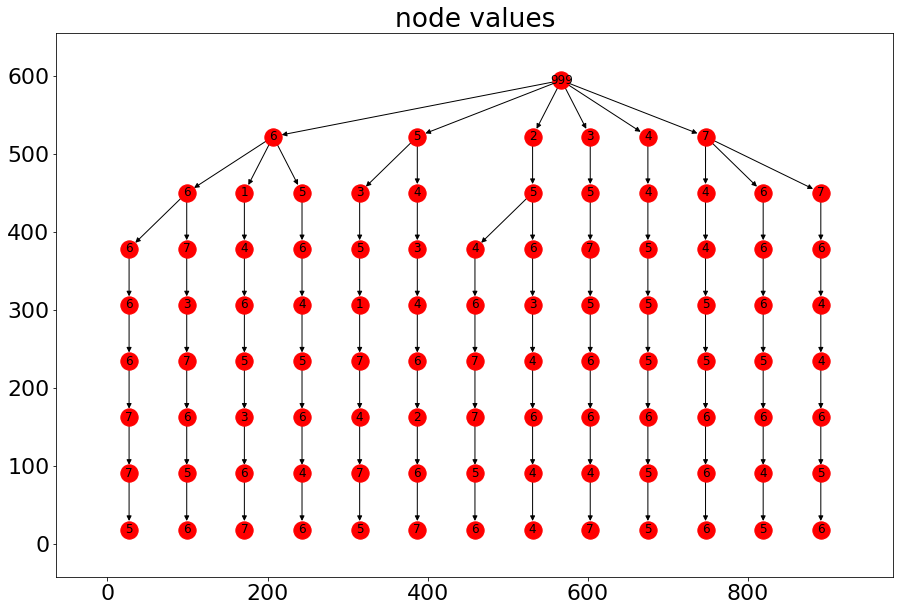

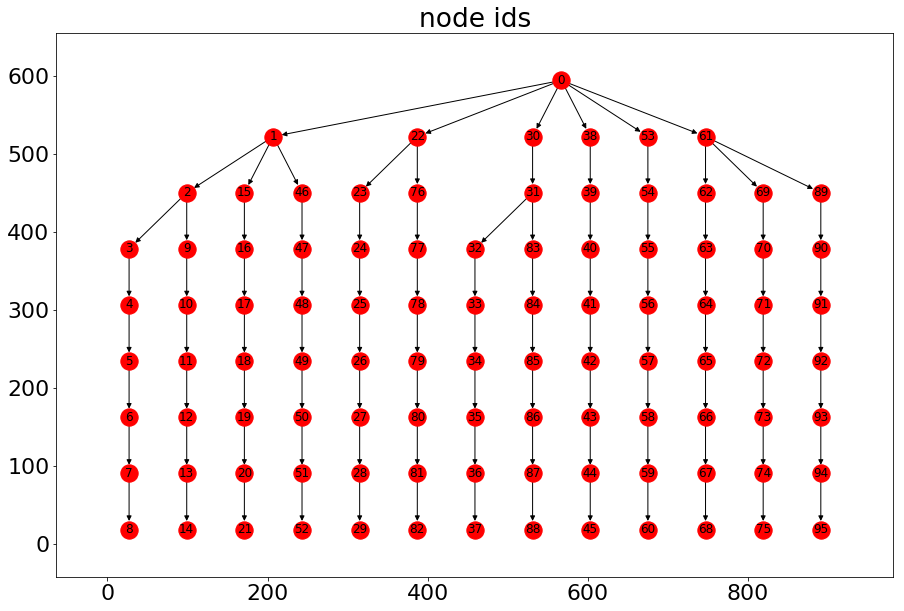

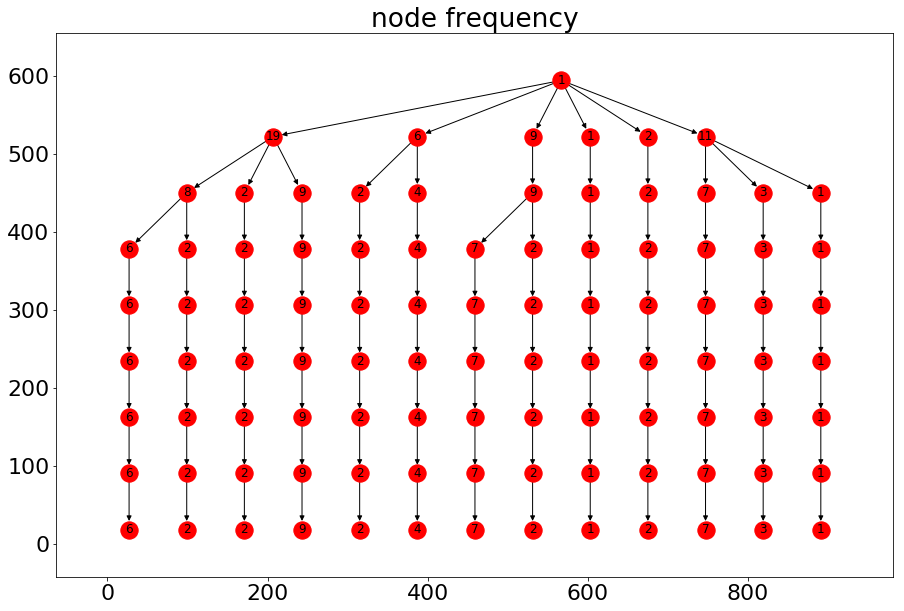

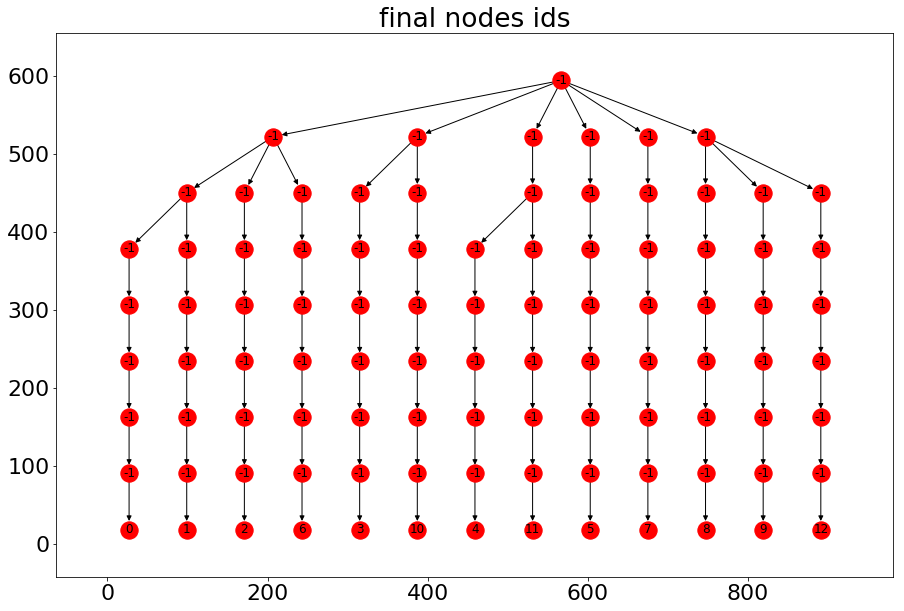

In [27]:

ops=generateOperations(100)
print(ops)
GG,counter = buildAbstractTree(GG, symbols, ops, counter)

# test the abstract with some operations

In [28]:
WL = 4 # window length
overlap = 0# int(WL/5)
GG1,counter1 = initTree()

In [29]:
ops=generateOperations(500, Test=False,verbose = False)